# BLSTM (Bidirectional Long Short-Term Memory) :

Epoch 1/50
6519/6519 [==============================] - 93s 12ms/step - loss: 0.0582 - accuracy: 0.9832 - val_loss: 0.0439 - val_accuracy: 0.9870
Epoch 2/50
6519/6519 [==============================] - 78s 12ms/step - loss: 0.0413 - accuracy: 0.9878 - val_loss: 0.0316 - val_accuracy: 0.9904
Epoch 3/50
6519/6519 [==============================] - 82s 13ms/step - loss: 0.0323 - accuracy: 0.9901 - val_loss: 0.0424 - val_accuracy: 0.9877
Epoch 4/50
6519/6519 [==============================] - 81s 12ms/step - loss: 0.0280 - accuracy: 0.9907 - val_loss: 0.0250 - val_accuracy: 0.9922
Epoch 5/50
6519/6519 [==============================] - 80s 12ms/step - loss: 0.0254 - accuracy: 0.9916 - val_loss: 0.0322 - val_accuracy: 0.9883
Epoch 6/50
6519/6519 [==============================] - 83s 13ms/step - loss: 0.0236 - accuracy: 0.9918 - val_loss: 0.0216 - val_accuracy: 0.9929
Epoch 7/50
6519/6519 [==============================] - 84s 13ms/step - loss: 0.0224 - accuracy: 0.9922 - val_loss: 0.0193 -

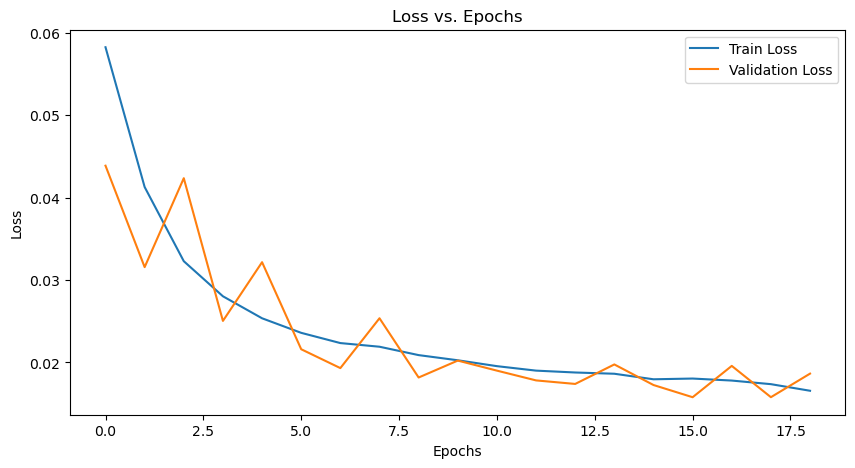

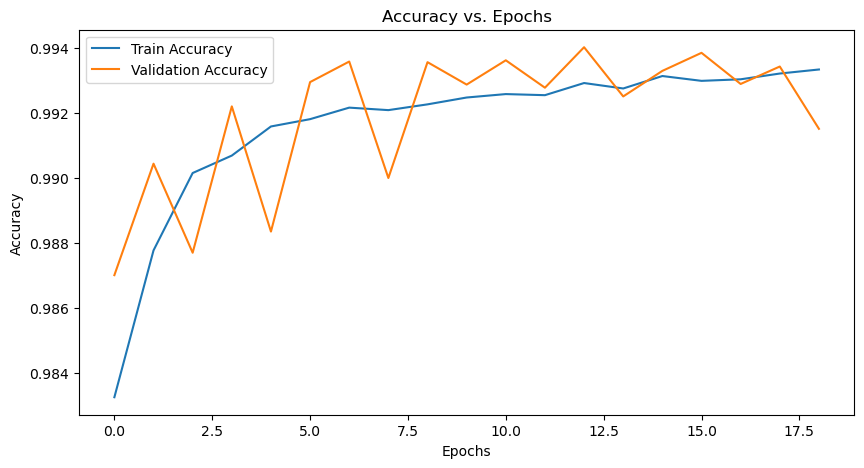

2038/2038 [==============================] - 11s 4ms/step
Accuracy: 0.9911332014051881
Precision: 0.818734793187348
Recall: 0.8277982779827798
F1 Score: 0.8232415902140673
auc-Score: 0.91


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Chargement du dataset
df = pd.read_csv('../final_desequilibre.csv')

# Séparation des features (X) et de la variable cible (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Normalisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Division des données en ensembles d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Division de l'ensemble d'entraînement en ensembles d'entraînement et de validation (20% parmi 80% pour la validation)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Créez le modèle BLSTM
model = models.Sequential()

# Couche BLSTM
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(layers.Bidirectional(layers.LSTM(32)))

# Couche fully connected (densément connectée)
model.add(layers.Dense(128, activation='relu'))

# Couche de sortie
model.add(layers.Dense(1, activation='sigmoid'))  # Une seule sortie binaire (fraude ou non)

# Compilation du modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary cross-entropy pour une classification binaire
              metrics=['accuracy'])

# Utilisation de callbacks pour arrêter l'entraînement prématurément si la perte de validation ne s'améliore pas
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Entraînez le modèle
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation), callbacks=[early_stopping])


# Visualisation de l'historique d'entraînement
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.show()


# Visualisation de l'historique d'entraînement
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Utilisez 'accuracy' ou 'acc' selon votre historique
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Utilisez 'val_accuracy' ou 'val_acc'
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.show()


# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Seuil de décision pour les prédictions binaires

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"auc-Score: {auc:.2f}")


In [2]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Calcul des métriques
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)


blstm_results = pd.DataFrame([['BLSTM', acc,prec,rec, f1, auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

# Sauvegardez le DataFrame dans un fichier CSV
blstm_results.to_csv('../evaluations/blstm_results.csv', index=False)

blstm_results

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,BLSTM,0.991133,0.818735,0.827798,0.823242,0.911555


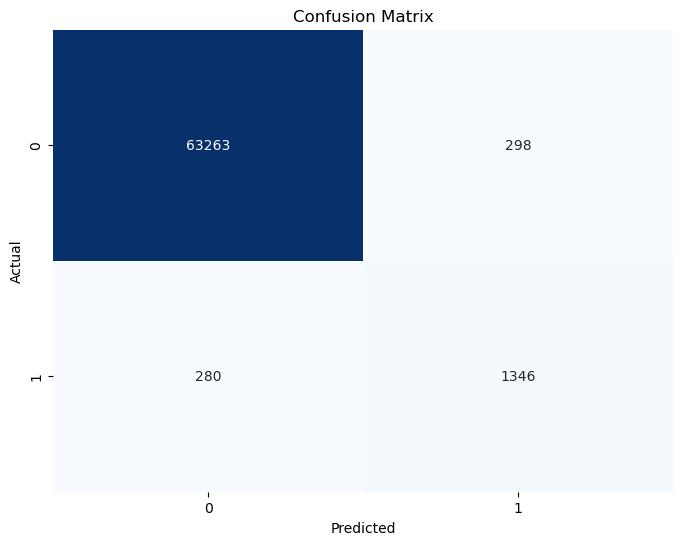

In [3]:

# Affichage de la matrice de confusion
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

